# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

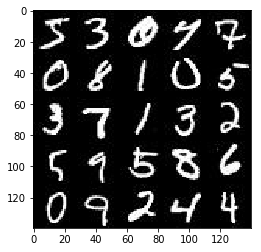

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

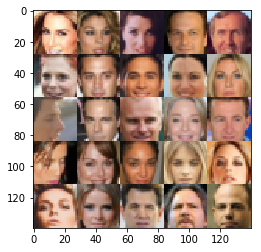

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


/Users/juanmi/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, [None, image_width, image_height, image_channels], name='input_real')
    input_z = tf.placeholder(tf.float32, [None, z_dim], name='input_z')
    lr = tf.placeholder(tf.float32, name='lr')

    return input_real, input_z, lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [9]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        
        ##input 28x28

        x1 = tf.layers.conv2d(images, 32, 5, strides=2, padding='same')
        relu1 = tf.maximum(0.2*x1, x1)
        ## 14x14
        
        x2 = tf.layers.conv2d(relu1, 64, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(0.2*bn2,bn2)
        ## 7x7x64
        
        x3 = tf.layers.conv2d(relu2, 128, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(0.2*bn3, bn3)
        
        flat = tf.reshape(relu3, (-1, 4*4*128))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        

    return out, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [10]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # Parameter with value function signature for leaky relu
    alpha = 0.2
    
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        
        #first fully connected
        x1 = tf.layers.dense(z, 2*2*128)
        x1 = tf.reshape(x1, (-1, 2, 2, 128))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1,x1)
        
        x2 = tf.layers.conv2d_transpose(x1, 64,5,strides=2, padding='valid')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        
        x3 = tf.layers.conv2d_transpose(x2, 32, 4, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 4, strides=2, padding='same')
        
        out = tf.tanh(logits)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [11]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    # GANs Build
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    # Calculating loss 
    d_loss_real = tf.reduce_mean( tf.nn.sigmoid_cross_entropy_with_logits( logits = d_logits_real,
                                                                           labels = tf.ones_like(d_model_real)
                                                                         )
                                )
    d_loss_fake = tf.reduce_mean( tf.nn.sigmoid_cross_entropy_with_logits( logits= d_logits_fake,
                                                                           labels = tf.zeros_like(d_model_fake)
                                                                         )
                                )
    g_loss = tf.reduce_mean( tf.nn.sigmoid_cross_entropy_with_logits( logits = d_logits_fake,
                                                                      labels= tf.ones_like(d_model_fake)
                                                                    )
                           )
    
    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [12]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [13]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [22]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    steps = 0    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                
                # TODO: Train Model
                steps += 1
                # Rescale
                batch_images *= 2
                
                # Noise
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # Optimizers
                _ = sess.run([d_train_opt, g_train_opt], 
                             feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                
                # Print progress
                if steps % 10 == 0:
                    #updates on losses
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    
                    if steps % 100 == 0:
                        #current generated image
                        show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.6662... Generator Loss: 0.8824
Epoch 1/2... Discriminator Loss: 0.0504... Generator Loss: 10.5291
Epoch 1/2... Discriminator Loss: 3.4774... Generator Loss: 0.0513
Epoch 1/2... Discriminator Loss: 1.4878... Generator Loss: 7.6310
Epoch 1/2... Discriminator Loss: 1.0911... Generator Loss: 4.2503
Epoch 1/2... Discriminator Loss: 0.7089... Generator Loss: 4.2006
Epoch 1/2... Discriminator Loss: 0.3201... Generator Loss: 2.2853
Epoch 1/2... Discriminator Loss: 0.0643... Generator Loss: 4.7324
Epoch 1/2... Discriminator Loss: 1.5040... Generator Loss: 0.3090
Epoch 1/2... Discriminator Loss: 0.9218... Generator Loss: 0.6661


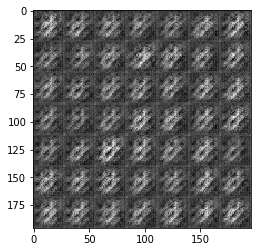

Epoch 1/2... Discriminator Loss: 0.5467... Generator Loss: 6.1920
Epoch 1/2... Discriminator Loss: 0.5837... Generator Loss: 8.2587
Epoch 1/2... Discriminator Loss: 0.0925... Generator Loss: 3.6575
Epoch 1/2... Discriminator Loss: 0.1343... Generator Loss: 3.2735
Epoch 1/2... Discriminator Loss: 1.0349... Generator Loss: 0.6386
Epoch 1/2... Discriminator Loss: 0.6545... Generator Loss: 1.0499
Epoch 1/2... Discriminator Loss: 0.8409... Generator Loss: 4.0355
Epoch 1/2... Discriminator Loss: 0.4952... Generator Loss: 3.4837
Epoch 1/2... Discriminator Loss: 0.4395... Generator Loss: 2.2789
Epoch 1/2... Discriminator Loss: 0.6513... Generator Loss: 3.5266


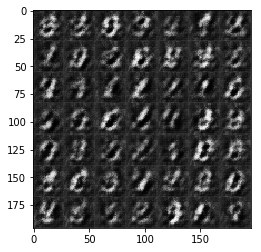

Epoch 1/2... Discriminator Loss: 0.9237... Generator Loss: 5.9531
Epoch 1/2... Discriminator Loss: 1.7918... Generator Loss: 0.3345
Epoch 1/2... Discriminator Loss: 0.8982... Generator Loss: 0.8124
Epoch 1/2... Discriminator Loss: 1.0700... Generator Loss: 0.5589
Epoch 1/2... Discriminator Loss: 1.6878... Generator Loss: 0.2676
Epoch 1/2... Discriminator Loss: 0.8883... Generator Loss: 0.7006
Epoch 1/2... Discriminator Loss: 0.7368... Generator Loss: 1.0154
Epoch 1/2... Discriminator Loss: 0.8402... Generator Loss: 0.8165
Epoch 1/2... Discriminator Loss: 0.8785... Generator Loss: 0.7361
Epoch 1/2... Discriminator Loss: 0.7007... Generator Loss: 1.1364


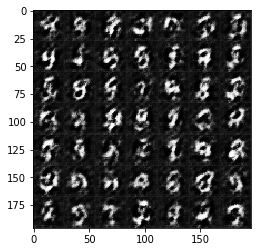

Epoch 1/2... Discriminator Loss: 0.8600... Generator Loss: 0.7478
Epoch 1/2... Discriminator Loss: 1.3262... Generator Loss: 0.4634
Epoch 1/2... Discriminator Loss: 0.6695... Generator Loss: 1.0052
Epoch 1/2... Discriminator Loss: 0.9722... Generator Loss: 0.6996
Epoch 1/2... Discriminator Loss: 0.9243... Generator Loss: 0.6575
Epoch 1/2... Discriminator Loss: 0.8476... Generator Loss: 0.7799
Epoch 1/2... Discriminator Loss: 0.7276... Generator Loss: 1.2336
Epoch 1/2... Discriminator Loss: 0.4903... Generator Loss: 1.4305
Epoch 1/2... Discriminator Loss: 0.8514... Generator Loss: 0.8414
Epoch 1/2... Discriminator Loss: 1.0340... Generator Loss: 0.5836


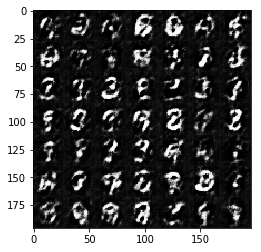

Epoch 1/2... Discriminator Loss: 0.6991... Generator Loss: 0.9665
Epoch 1/2... Discriminator Loss: 0.8529... Generator Loss: 0.7494
Epoch 1/2... Discriminator Loss: 0.8668... Generator Loss: 0.7493
Epoch 1/2... Discriminator Loss: 1.7470... Generator Loss: 0.2491
Epoch 1/2... Discriminator Loss: 0.3626... Generator Loss: 2.1085
Epoch 1/2... Discriminator Loss: 0.7865... Generator Loss: 4.1795
Epoch 1/2... Discriminator Loss: 0.9424... Generator Loss: 3.4087
Epoch 1/2... Discriminator Loss: 0.4813... Generator Loss: 1.5176
Epoch 1/2... Discriminator Loss: 0.6381... Generator Loss: 1.0337
Epoch 1/2... Discriminator Loss: 0.5980... Generator Loss: 1.0532


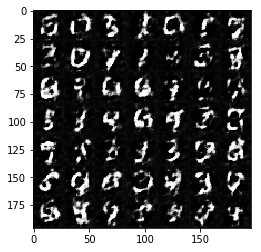

Epoch 1/2... Discriminator Loss: 2.3114... Generator Loss: 0.1656
Epoch 1/2... Discriminator Loss: 0.7122... Generator Loss: 0.9003
Epoch 1/2... Discriminator Loss: 0.5553... Generator Loss: 1.5369
Epoch 1/2... Discriminator Loss: 0.4063... Generator Loss: 1.8631
Epoch 1/2... Discriminator Loss: 0.8948... Generator Loss: 4.2357
Epoch 1/2... Discriminator Loss: 0.5212... Generator Loss: 1.4420
Epoch 1/2... Discriminator Loss: 1.0745... Generator Loss: 0.5893
Epoch 1/2... Discriminator Loss: 0.9081... Generator Loss: 0.6985
Epoch 1/2... Discriminator Loss: 0.4770... Generator Loss: 2.7301
Epoch 1/2... Discriminator Loss: 1.2388... Generator Loss: 0.4763


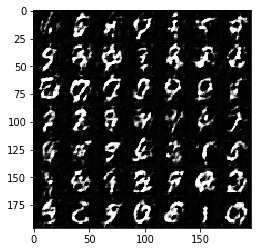

Epoch 1/2... Discriminator Loss: 0.8513... Generator Loss: 0.7816
Epoch 1/2... Discriminator Loss: 1.4234... Generator Loss: 0.3925
Epoch 1/2... Discriminator Loss: 0.7256... Generator Loss: 0.9271
Epoch 1/2... Discriminator Loss: 0.9458... Generator Loss: 0.6964
Epoch 1/2... Discriminator Loss: 1.4669... Generator Loss: 0.3869
Epoch 1/2... Discriminator Loss: 1.6762... Generator Loss: 0.3285
Epoch 1/2... Discriminator Loss: 0.6921... Generator Loss: 1.0719
Epoch 1/2... Discriminator Loss: 1.0413... Generator Loss: 0.6057
Epoch 1/2... Discriminator Loss: 0.6233... Generator Loss: 1.0491
Epoch 1/2... Discriminator Loss: 0.4984... Generator Loss: 1.7396


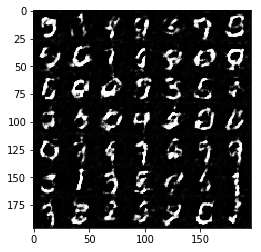

Epoch 1/2... Discriminator Loss: 1.0633... Generator Loss: 3.9304
Epoch 1/2... Discriminator Loss: 0.4950... Generator Loss: 1.6975
Epoch 1/2... Discriminator Loss: 0.6178... Generator Loss: 2.4836
Epoch 1/2... Discriminator Loss: 0.4039... Generator Loss: 2.8650
Epoch 1/2... Discriminator Loss: 1.3084... Generator Loss: 3.8938
Epoch 1/2... Discriminator Loss: 0.5456... Generator Loss: 1.4814
Epoch 1/2... Discriminator Loss: 1.1564... Generator Loss: 0.5175
Epoch 1/2... Discriminator Loss: 1.6559... Generator Loss: 0.2901
Epoch 1/2... Discriminator Loss: 0.9517... Generator Loss: 0.6606
Epoch 1/2... Discriminator Loss: 1.4830... Generator Loss: 0.3740


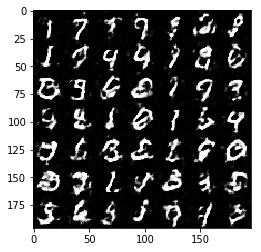

Epoch 1/2... Discriminator Loss: 0.5962... Generator Loss: 1.2119
Epoch 1/2... Discriminator Loss: 1.1875... Generator Loss: 0.4519
Epoch 1/2... Discriminator Loss: 1.1704... Generator Loss: 0.5417
Epoch 1/2... Discriminator Loss: 0.6192... Generator Loss: 1.0306
Epoch 1/2... Discriminator Loss: 0.6625... Generator Loss: 1.7538
Epoch 1/2... Discriminator Loss: 2.1789... Generator Loss: 0.1624
Epoch 1/2... Discriminator Loss: 1.2360... Generator Loss: 3.2951
Epoch 1/2... Discriminator Loss: 0.5824... Generator Loss: 1.2326
Epoch 1/2... Discriminator Loss: 0.7836... Generator Loss: 0.8652
Epoch 1/2... Discriminator Loss: 1.4993... Generator Loss: 0.3708


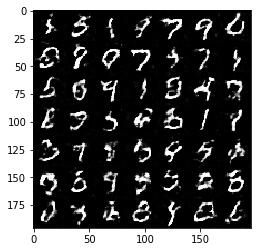

Epoch 1/2... Discriminator Loss: 1.1575... Generator Loss: 0.5045
Epoch 1/2... Discriminator Loss: 3.0211... Generator Loss: 0.0728
Epoch 1/2... Discriminator Loss: 0.8597... Generator Loss: 0.7864
Epoch 2/2... Discriminator Loss: 0.7834... Generator Loss: 0.8180
Epoch 2/2... Discriminator Loss: 0.4269... Generator Loss: 1.9853
Epoch 2/2... Discriminator Loss: 0.5370... Generator Loss: 1.3392
Epoch 2/2... Discriminator Loss: 1.6285... Generator Loss: 0.3073
Epoch 2/2... Discriminator Loss: 0.6871... Generator Loss: 1.1028
Epoch 2/2... Discriminator Loss: 0.8198... Generator Loss: 0.8392
Epoch 2/2... Discriminator Loss: 1.8024... Generator Loss: 0.2200


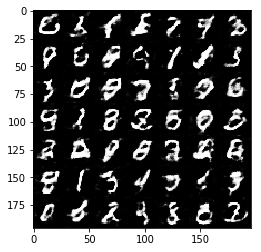

Epoch 2/2... Discriminator Loss: 1.1544... Generator Loss: 0.5597
Epoch 2/2... Discriminator Loss: 0.5275... Generator Loss: 1.2325
Epoch 2/2... Discriminator Loss: 0.8910... Generator Loss: 0.6931
Epoch 2/2... Discriminator Loss: 0.7544... Generator Loss: 2.6409
Epoch 2/2... Discriminator Loss: 0.5528... Generator Loss: 1.6142
Epoch 2/2... Discriminator Loss: 1.0404... Generator Loss: 0.5522
Epoch 2/2... Discriminator Loss: 1.4638... Generator Loss: 0.3335
Epoch 2/2... Discriminator Loss: 1.3689... Generator Loss: 0.4232
Epoch 2/2... Discriminator Loss: 0.7696... Generator Loss: 0.9525
Epoch 2/2... Discriminator Loss: 0.9585... Generator Loss: 0.6690


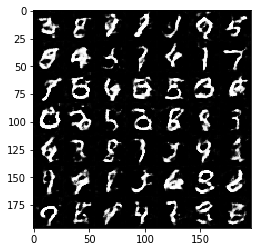

Epoch 2/2... Discriminator Loss: 2.0097... Generator Loss: 0.2557
Epoch 2/2... Discriminator Loss: 0.9061... Generator Loss: 0.8087
Epoch 2/2... Discriminator Loss: 0.5483... Generator Loss: 1.1929
Epoch 2/2... Discriminator Loss: 0.7876... Generator Loss: 0.7972
Epoch 2/2... Discriminator Loss: 2.3730... Generator Loss: 0.1384
Epoch 2/2... Discriminator Loss: 0.7957... Generator Loss: 0.8963
Epoch 2/2... Discriminator Loss: 0.7309... Generator Loss: 2.0231
Epoch 2/2... Discriminator Loss: 0.9713... Generator Loss: 0.6872
Epoch 2/2... Discriminator Loss: 0.8221... Generator Loss: 0.7579
Epoch 2/2... Discriminator Loss: 0.8169... Generator Loss: 0.8594


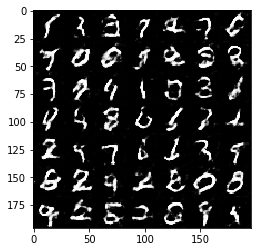

Epoch 2/2... Discriminator Loss: 0.5113... Generator Loss: 2.4288
Epoch 2/2... Discriminator Loss: 0.6847... Generator Loss: 2.6090
Epoch 2/2... Discriminator Loss: 1.2506... Generator Loss: 0.5166
Epoch 2/2... Discriminator Loss: 1.3428... Generator Loss: 0.4625
Epoch 2/2... Discriminator Loss: 0.6304... Generator Loss: 1.1155
Epoch 2/2... Discriminator Loss: 0.7089... Generator Loss: 1.2039
Epoch 2/2... Discriminator Loss: 0.6677... Generator Loss: 1.4706
Epoch 2/2... Discriminator Loss: 0.6975... Generator Loss: 2.0883
Epoch 2/2... Discriminator Loss: 0.7599... Generator Loss: 0.9191
Epoch 2/2... Discriminator Loss: 0.5681... Generator Loss: 1.3311


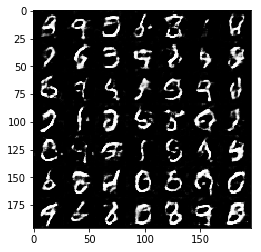

Epoch 2/2... Discriminator Loss: 0.9352... Generator Loss: 0.6412
Epoch 2/2... Discriminator Loss: 0.6478... Generator Loss: 1.3383
Epoch 2/2... Discriminator Loss: 1.2597... Generator Loss: 0.4934
Epoch 2/2... Discriminator Loss: 2.4409... Generator Loss: 0.1661
Epoch 2/2... Discriminator Loss: 2.2265... Generator Loss: 0.1611
Epoch 2/2... Discriminator Loss: 0.7965... Generator Loss: 0.8849
Epoch 2/2... Discriminator Loss: 0.4928... Generator Loss: 2.4674
Epoch 2/2... Discriminator Loss: 0.5439... Generator Loss: 1.5051
Epoch 2/2... Discriminator Loss: 0.4483... Generator Loss: 1.7163
Epoch 2/2... Discriminator Loss: 2.4574... Generator Loss: 4.3670


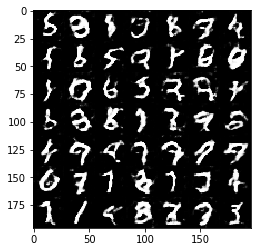

Epoch 2/2... Discriminator Loss: 0.8115... Generator Loss: 0.7555
Epoch 2/2... Discriminator Loss: 2.0301... Generator Loss: 0.2479
Epoch 2/2... Discriminator Loss: 1.0297... Generator Loss: 0.6226
Epoch 2/2... Discriminator Loss: 0.5747... Generator Loss: 1.0923
Epoch 2/2... Discriminator Loss: 0.8084... Generator Loss: 0.8027
Epoch 2/2... Discriminator Loss: 4.1572... Generator Loss: 6.5733
Epoch 2/2... Discriminator Loss: 0.8317... Generator Loss: 2.0183
Epoch 2/2... Discriminator Loss: 0.6960... Generator Loss: 1.1000
Epoch 2/2... Discriminator Loss: 1.0091... Generator Loss: 0.6059
Epoch 2/2... Discriminator Loss: 0.9043... Generator Loss: 0.7335


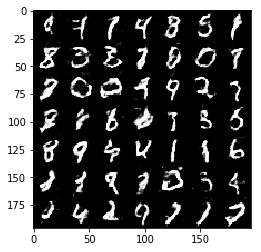

Epoch 2/2... Discriminator Loss: 0.9351... Generator Loss: 0.7318
Epoch 2/2... Discriminator Loss: 0.7058... Generator Loss: 0.9955
Epoch 2/2... Discriminator Loss: 0.4937... Generator Loss: 1.3889
Epoch 2/2... Discriminator Loss: 0.6690... Generator Loss: 0.9008
Epoch 2/2... Discriminator Loss: 0.9293... Generator Loss: 0.6532
Epoch 2/2... Discriminator Loss: 0.5386... Generator Loss: 1.9834
Epoch 2/2... Discriminator Loss: 0.7090... Generator Loss: 1.0723
Epoch 2/2... Discriminator Loss: 0.6226... Generator Loss: 1.0725
Epoch 2/2... Discriminator Loss: 0.9934... Generator Loss: 0.6687
Epoch 2/2... Discriminator Loss: 0.6953... Generator Loss: 1.0402


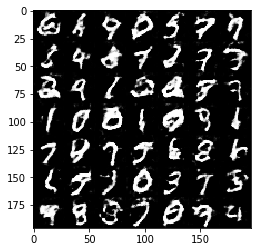

Epoch 2/2... Discriminator Loss: 1.0466... Generator Loss: 2.0361
Epoch 2/2... Discriminator Loss: 0.7825... Generator Loss: 2.4422
Epoch 2/2... Discriminator Loss: 0.7162... Generator Loss: 0.9871
Epoch 2/2... Discriminator Loss: 0.8737... Generator Loss: 0.7299
Epoch 2/2... Discriminator Loss: 0.8162... Generator Loss: 0.7670
Epoch 2/2... Discriminator Loss: 0.8272... Generator Loss: 0.8023
Epoch 2/2... Discriminator Loss: 0.7916... Generator Loss: 0.8211
Epoch 2/2... Discriminator Loss: 0.6321... Generator Loss: 0.9812
Epoch 2/2... Discriminator Loss: 0.6230... Generator Loss: 0.9592
Epoch 2/2... Discriminator Loss: 1.1059... Generator Loss: 0.5119


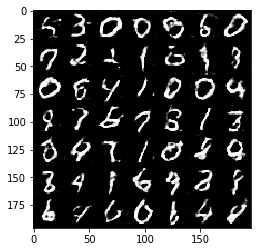

Epoch 2/2... Discriminator Loss: 0.6999... Generator Loss: 0.9432
Epoch 2/2... Discriminator Loss: 0.9545... Generator Loss: 1.7192
Epoch 2/2... Discriminator Loss: 0.8676... Generator Loss: 2.2432
Epoch 2/2... Discriminator Loss: 0.7477... Generator Loss: 0.8994
Epoch 2/2... Discriminator Loss: 0.6783... Generator Loss: 1.0669
Epoch 2/2... Discriminator Loss: 1.0454... Generator Loss: 0.6390
Epoch 2/2... Discriminator Loss: 0.6913... Generator Loss: 0.9286
Epoch 2/2... Discriminator Loss: 1.2820... Generator Loss: 0.5089
Epoch 2/2... Discriminator Loss: 0.6912... Generator Loss: 0.9446
Epoch 2/2... Discriminator Loss: 0.7979... Generator Loss: 2.2887


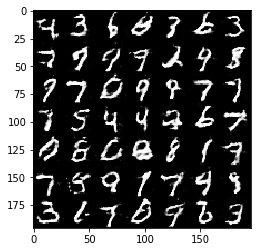

Epoch 2/2... Discriminator Loss: 0.5580... Generator Loss: 1.5531
Epoch 2/2... Discriminator Loss: 0.8201... Generator Loss: 0.9014
Epoch 2/2... Discriminator Loss: 0.5786... Generator Loss: 1.5227
Epoch 2/2... Discriminator Loss: 0.8039... Generator Loss: 0.8298
Epoch 2/2... Discriminator Loss: 0.5619... Generator Loss: 1.7803
Epoch 2/2... Discriminator Loss: 0.5598... Generator Loss: 1.5711
Epoch 2/2... Discriminator Loss: 0.3922... Generator Loss: 1.6302


In [20]:
batch_size = 64
z_dim = 128
learning_rate = 0.0005
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.6564... Generator Loss: 0.8875
Epoch 1/1... Discriminator Loss: 0.5576... Generator Loss: 1.0296
Epoch 1/1... Discriminator Loss: 0.0428... Generator Loss: 9.1265
Epoch 1/1... Discriminator Loss: 1.6921... Generator Loss: 0.2701
Epoch 1/1... Discriminator Loss: 0.0327... Generator Loss: 6.5305
Epoch 1/1... Discriminator Loss: 0.0729... Generator Loss: 5.3141
Epoch 1/1... Discriminator Loss: 1.7301... Generator Loss: 0.2578
Epoch 1/1... Discriminator Loss: 0.2006... Generator Loss: 2.7639
Epoch 1/1... Discriminator Loss: 2.2020... Generator Loss: 0.1567
Epoch 1/1... Discriminator Loss: 0.1805... Generator Loss: 4.0792


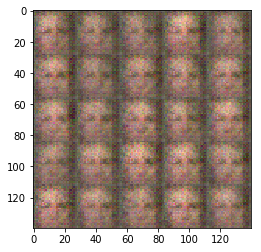

Epoch 1/1... Discriminator Loss: 0.3786... Generator Loss: 2.7608
Epoch 1/1... Discriminator Loss: 0.3023... Generator Loss: 2.0756
Epoch 1/1... Discriminator Loss: 0.4603... Generator Loss: 6.8527
Epoch 1/1... Discriminator Loss: 0.7502... Generator Loss: 0.7912
Epoch 1/1... Discriminator Loss: 0.1740... Generator Loss: 5.6881
Epoch 1/1... Discriminator Loss: 0.3949... Generator Loss: 3.9005
Epoch 1/1... Discriminator Loss: 0.7319... Generator Loss: 0.9567
Epoch 1/1... Discriminator Loss: 0.3850... Generator Loss: 2.4183
Epoch 1/1... Discriminator Loss: 0.3106... Generator Loss: 2.8562
Epoch 1/1... Discriminator Loss: 0.3303... Generator Loss: 3.5658


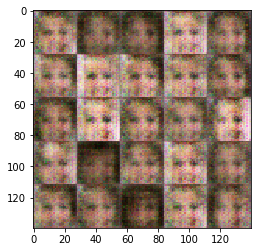

Epoch 1/1... Discriminator Loss: 0.3197... Generator Loss: 2.0795
Epoch 1/1... Discriminator Loss: 0.6537... Generator Loss: 4.8147
Epoch 1/1... Discriminator Loss: 1.0461... Generator Loss: 0.6137
Epoch 1/1... Discriminator Loss: 0.4370... Generator Loss: 2.6928
Epoch 1/1... Discriminator Loss: 1.0742... Generator Loss: 6.5058
Epoch 1/1... Discriminator Loss: 2.0895... Generator Loss: 7.8566
Epoch 1/1... Discriminator Loss: 0.4165... Generator Loss: 1.7187
Epoch 1/1... Discriminator Loss: 0.9661... Generator Loss: 0.6708
Epoch 1/1... Discriminator Loss: 0.7097... Generator Loss: 2.0456
Epoch 1/1... Discriminator Loss: 0.6905... Generator Loss: 1.2709


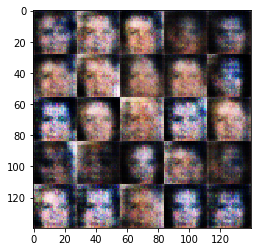

Epoch 1/1... Discriminator Loss: 0.5596... Generator Loss: 2.5633
Epoch 1/1... Discriminator Loss: 0.6634... Generator Loss: 3.1288
Epoch 1/1... Discriminator Loss: 1.0697... Generator Loss: 3.3927
Epoch 1/1... Discriminator Loss: 1.0081... Generator Loss: 3.3028
Epoch 1/1... Discriminator Loss: 0.8194... Generator Loss: 2.5592
Epoch 1/1... Discriminator Loss: 0.6593... Generator Loss: 2.0481
Epoch 1/1... Discriminator Loss: 0.6093... Generator Loss: 1.6639
Epoch 1/1... Discriminator Loss: 0.7248... Generator Loss: 2.4887
Epoch 1/1... Discriminator Loss: 0.5052... Generator Loss: 1.8248
Epoch 1/1... Discriminator Loss: 0.5135... Generator Loss: 2.4207


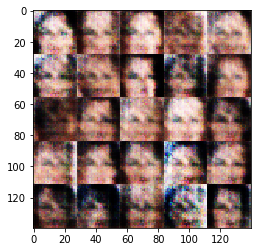

Epoch 1/1... Discriminator Loss: 0.8507... Generator Loss: 3.7618
Epoch 1/1... Discriminator Loss: 0.5376... Generator Loss: 2.5525
Epoch 1/1... Discriminator Loss: 0.5179... Generator Loss: 3.0054
Epoch 1/1... Discriminator Loss: 0.7393... Generator Loss: 3.1537
Epoch 1/1... Discriminator Loss: 1.0771... Generator Loss: 4.1756
Epoch 1/1... Discriminator Loss: 0.7905... Generator Loss: 4.0852
Epoch 1/1... Discriminator Loss: 0.6832... Generator Loss: 1.5983
Epoch 1/1... Discriminator Loss: 0.6549... Generator Loss: 3.4306
Epoch 1/1... Discriminator Loss: 1.3106... Generator Loss: 4.3158
Epoch 1/1... Discriminator Loss: 1.1936... Generator Loss: 3.4457


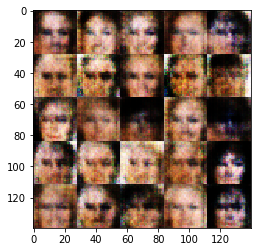

Epoch 1/1... Discriminator Loss: 0.9490... Generator Loss: 0.6600
Epoch 1/1... Discriminator Loss: 1.2196... Generator Loss: 0.4925
Epoch 1/1... Discriminator Loss: 1.1715... Generator Loss: 0.4932
Epoch 1/1... Discriminator Loss: 1.6107... Generator Loss: 0.3044
Epoch 1/1... Discriminator Loss: 1.0952... Generator Loss: 0.5524
Epoch 1/1... Discriminator Loss: 0.5924... Generator Loss: 1.1495
Epoch 1/1... Discriminator Loss: 2.5933... Generator Loss: 0.0946
Epoch 1/1... Discriminator Loss: 0.6356... Generator Loss: 3.0901
Epoch 1/1... Discriminator Loss: 0.7251... Generator Loss: 2.6325
Epoch 1/1... Discriminator Loss: 1.1286... Generator Loss: 3.4000


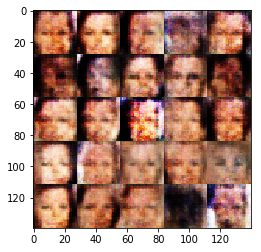

Epoch 1/1... Discriminator Loss: 1.2866... Generator Loss: 3.8455
Epoch 1/1... Discriminator Loss: 1.0101... Generator Loss: 3.1199
Epoch 1/1... Discriminator Loss: 0.6568... Generator Loss: 2.1132
Epoch 1/1... Discriminator Loss: 1.3306... Generator Loss: 0.4153
Epoch 1/1... Discriminator Loss: 1.0213... Generator Loss: 0.6421
Epoch 1/1... Discriminator Loss: 1.5916... Generator Loss: 0.3016
Epoch 1/1... Discriminator Loss: 1.2642... Generator Loss: 0.4864
Epoch 1/1... Discriminator Loss: 0.9313... Generator Loss: 0.7807
Epoch 1/1... Discriminator Loss: 1.2462... Generator Loss: 0.6113
Epoch 1/1... Discriminator Loss: 1.3280... Generator Loss: 0.4309


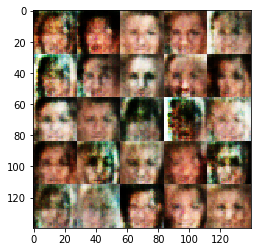

Epoch 1/1... Discriminator Loss: 0.9640... Generator Loss: 0.6949
Epoch 1/1... Discriminator Loss: 1.0956... Generator Loss: 0.5758
Epoch 1/1... Discriminator Loss: 1.1006... Generator Loss: 0.5653
Epoch 1/1... Discriminator Loss: 1.0374... Generator Loss: 0.6085
Epoch 1/1... Discriminator Loss: 0.9799... Generator Loss: 0.6556
Epoch 1/1... Discriminator Loss: 1.3985... Generator Loss: 0.3634
Epoch 1/1... Discriminator Loss: 1.0076... Generator Loss: 0.6903
Epoch 1/1... Discriminator Loss: 0.6175... Generator Loss: 1.9299
Epoch 1/1... Discriminator Loss: 1.0032... Generator Loss: 2.8191
Epoch 1/1... Discriminator Loss: 0.9485... Generator Loss: 2.2581


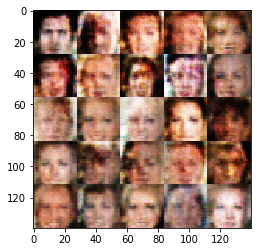

Epoch 1/1... Discriminator Loss: 0.6987... Generator Loss: 2.1845
Epoch 1/1... Discriminator Loss: 0.7714... Generator Loss: 2.3602
Epoch 1/1... Discriminator Loss: 0.9202... Generator Loss: 2.2651
Epoch 1/1... Discriminator Loss: 0.9043... Generator Loss: 1.8898
Epoch 1/1... Discriminator Loss: 0.7504... Generator Loss: 1.5800
Epoch 1/1... Discriminator Loss: 0.7927... Generator Loss: 1.9928
Epoch 1/1... Discriminator Loss: 1.2778... Generator Loss: 0.4360
Epoch 1/1... Discriminator Loss: 1.5108... Generator Loss: 0.3641
Epoch 1/1... Discriminator Loss: 1.1348... Generator Loss: 0.6866
Epoch 1/1... Discriminator Loss: 1.4521... Generator Loss: 0.4064


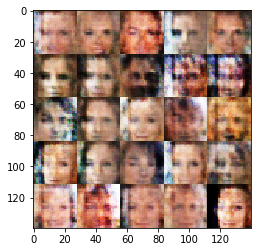

Epoch 1/1... Discriminator Loss: 0.9058... Generator Loss: 0.7742
Epoch 1/1... Discriminator Loss: 1.3906... Generator Loss: 0.4084
Epoch 1/1... Discriminator Loss: 1.3402... Generator Loss: 0.4583
Epoch 1/1... Discriminator Loss: 1.2254... Generator Loss: 0.5277
Epoch 1/1... Discriminator Loss: 1.4711... Generator Loss: 0.3814
Epoch 1/1... Discriminator Loss: 1.0721... Generator Loss: 0.6301
Epoch 1/1... Discriminator Loss: 1.3947... Generator Loss: 0.3822
Epoch 1/1... Discriminator Loss: 1.5383... Generator Loss: 0.3203
Epoch 1/1... Discriminator Loss: 1.3024... Generator Loss: 0.4986
Epoch 1/1... Discriminator Loss: 0.9935... Generator Loss: 0.6472


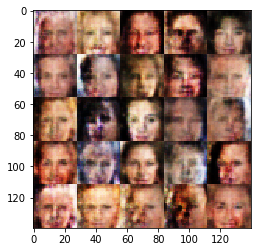

Epoch 1/1... Discriminator Loss: 1.1940... Generator Loss: 0.5146
Epoch 1/1... Discriminator Loss: 1.2294... Generator Loss: 0.5069
Epoch 1/1... Discriminator Loss: 1.1683... Generator Loss: 0.5114
Epoch 1/1... Discriminator Loss: 0.8514... Generator Loss: 1.1598
Epoch 1/1... Discriminator Loss: 0.7924... Generator Loss: 2.1205
Epoch 1/1... Discriminator Loss: 0.9209... Generator Loss: 2.1492
Epoch 1/1... Discriminator Loss: 0.9024... Generator Loss: 2.7527
Epoch 1/1... Discriminator Loss: 0.7791... Generator Loss: 1.5327
Epoch 1/1... Discriminator Loss: 1.1240... Generator Loss: 3.0114
Epoch 1/1... Discriminator Loss: 0.8011... Generator Loss: 1.6713


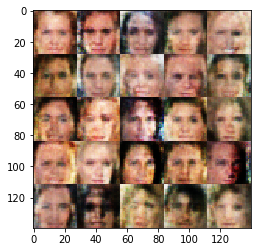

Epoch 1/1... Discriminator Loss: 0.9473... Generator Loss: 2.1120
Epoch 1/1... Discriminator Loss: 0.8878... Generator Loss: 2.2747
Epoch 1/1... Discriminator Loss: 0.7339... Generator Loss: 1.7889
Epoch 1/1... Discriminator Loss: 0.9926... Generator Loss: 0.7330
Epoch 1/1... Discriminator Loss: 1.0788... Generator Loss: 0.5837
Epoch 1/1... Discriminator Loss: 1.7930... Generator Loss: 0.2450
Epoch 1/1... Discriminator Loss: 1.2195... Generator Loss: 0.4904
Epoch 1/1... Discriminator Loss: 1.0420... Generator Loss: 0.6484
Epoch 1/1... Discriminator Loss: 1.0691... Generator Loss: 2.9325
Epoch 1/1... Discriminator Loss: 0.7740... Generator Loss: 1.9546


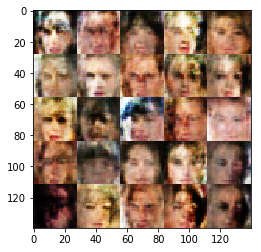

Epoch 1/1... Discriminator Loss: 0.8369... Generator Loss: 2.3979
Epoch 1/1... Discriminator Loss: 0.7954... Generator Loss: 1.1882
Epoch 1/1... Discriminator Loss: 0.9549... Generator Loss: 2.4964
Epoch 1/1... Discriminator Loss: 1.1207... Generator Loss: 0.5672
Epoch 1/1... Discriminator Loss: 1.6237... Generator Loss: 0.3124
Epoch 1/1... Discriminator Loss: 1.6396... Generator Loss: 0.2989
Epoch 1/1... Discriminator Loss: 1.3154... Generator Loss: 0.4408
Epoch 1/1... Discriminator Loss: 1.2278... Generator Loss: 0.4840
Epoch 1/1... Discriminator Loss: 0.9944... Generator Loss: 0.6945
Epoch 1/1... Discriminator Loss: 1.2510... Generator Loss: 0.4754


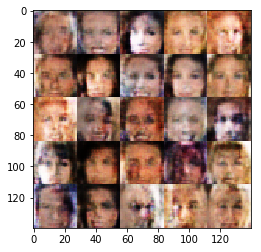

Epoch 1/1... Discriminator Loss: 1.2257... Generator Loss: 0.5475
Epoch 1/1... Discriminator Loss: 1.4210... Generator Loss: 0.3960
Epoch 1/1... Discriminator Loss: 0.8705... Generator Loss: 0.8731
Epoch 1/1... Discriminator Loss: 1.3975... Generator Loss: 0.3635
Epoch 1/1... Discriminator Loss: 1.2180... Generator Loss: 0.5002
Epoch 1/1... Discriminator Loss: 0.8044... Generator Loss: 1.0846
Epoch 1/1... Discriminator Loss: 0.9130... Generator Loss: 0.7418
Epoch 1/1... Discriminator Loss: 1.8511... Generator Loss: 0.2316
Epoch 1/1... Discriminator Loss: 0.7363... Generator Loss: 1.4478
Epoch 1/1... Discriminator Loss: 0.8688... Generator Loss: 1.5518


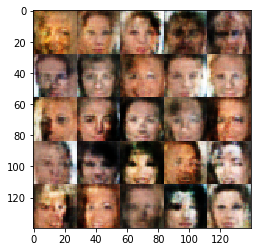

Epoch 1/1... Discriminator Loss: 1.1355... Generator Loss: 0.5357
Epoch 1/1... Discriminator Loss: 1.3120... Generator Loss: 0.4299
Epoch 1/1... Discriminator Loss: 1.9923... Generator Loss: 0.2019
Epoch 1/1... Discriminator Loss: 0.9059... Generator Loss: 0.7443
Epoch 1/1... Discriminator Loss: 0.8002... Generator Loss: 1.0907
Epoch 1/1... Discriminator Loss: 1.8897... Generator Loss: 0.2153
Epoch 1/1... Discriminator Loss: 1.0496... Generator Loss: 0.7485
Epoch 1/1... Discriminator Loss: 1.5955... Generator Loss: 0.3187
Epoch 1/1... Discriminator Loss: 0.7299... Generator Loss: 1.1518
Epoch 1/1... Discriminator Loss: 1.2472... Generator Loss: 0.4644


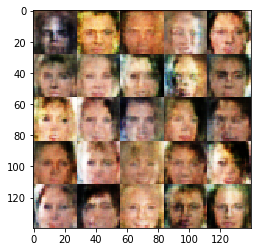

Epoch 1/1... Discriminator Loss: 0.8193... Generator Loss: 0.9251
Epoch 1/1... Discriminator Loss: 1.3674... Generator Loss: 0.4093
Epoch 1/1... Discriminator Loss: 0.9166... Generator Loss: 0.7911
Epoch 1/1... Discriminator Loss: 0.7736... Generator Loss: 2.3153
Epoch 1/1... Discriminator Loss: 0.8115... Generator Loss: 2.0245
Epoch 1/1... Discriminator Loss: 0.7238... Generator Loss: 1.6244
Epoch 1/1... Discriminator Loss: 0.8013... Generator Loss: 1.9643
Epoch 1/1... Discriminator Loss: 0.8093... Generator Loss: 2.4736
Epoch 1/1... Discriminator Loss: 0.8593... Generator Loss: 0.9635
Epoch 1/1... Discriminator Loss: 1.6171... Generator Loss: 0.2919


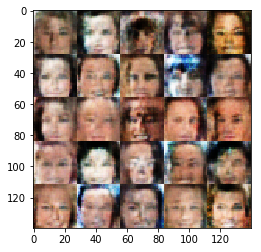

Epoch 1/1... Discriminator Loss: 1.1714... Generator Loss: 0.5517
Epoch 1/1... Discriminator Loss: 1.4819... Generator Loss: 0.3516
Epoch 1/1... Discriminator Loss: 1.1680... Generator Loss: 0.5031
Epoch 1/1... Discriminator Loss: 1.6332... Generator Loss: 0.2973
Epoch 1/1... Discriminator Loss: 1.1883... Generator Loss: 0.5159
Epoch 1/1... Discriminator Loss: 1.7478... Generator Loss: 0.2681
Epoch 1/1... Discriminator Loss: 0.8038... Generator Loss: 1.1278
Epoch 1/1... Discriminator Loss: 1.0315... Generator Loss: 0.8595
Epoch 1/1... Discriminator Loss: 1.0318... Generator Loss: 0.6172
Epoch 1/1... Discriminator Loss: 1.0359... Generator Loss: 2.7565


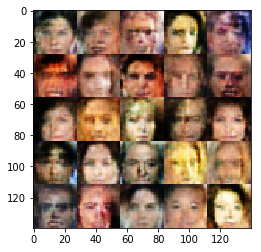

Epoch 1/1... Discriminator Loss: 0.7718... Generator Loss: 1.9362
Epoch 1/1... Discriminator Loss: 0.8623... Generator Loss: 1.4219
Epoch 1/1... Discriminator Loss: 1.1931... Generator Loss: 2.6840
Epoch 1/1... Discriminator Loss: 0.7389... Generator Loss: 1.6219
Epoch 1/1... Discriminator Loss: 0.9438... Generator Loss: 2.3266
Epoch 1/1... Discriminator Loss: 1.3089... Generator Loss: 0.4211
Epoch 1/1... Discriminator Loss: 0.8018... Generator Loss: 1.6275
Epoch 1/1... Discriminator Loss: 0.8230... Generator Loss: 1.1854
Epoch 1/1... Discriminator Loss: 0.7794... Generator Loss: 1.4647
Epoch 1/1... Discriminator Loss: 2.0007... Generator Loss: 0.2193


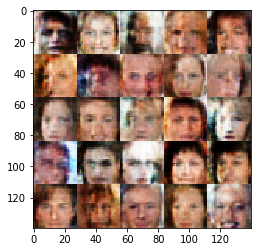

Epoch 1/1... Discriminator Loss: 0.8772... Generator Loss: 1.7144
Epoch 1/1... Discriminator Loss: 0.9300... Generator Loss: 0.7151
Epoch 1/1... Discriminator Loss: 0.9392... Generator Loss: 2.0235
Epoch 1/1... Discriminator Loss: 0.7846... Generator Loss: 1.3557
Epoch 1/1... Discriminator Loss: 0.7992... Generator Loss: 2.4904
Epoch 1/1... Discriminator Loss: 1.3836... Generator Loss: 3.2760
Epoch 1/1... Discriminator Loss: 0.8926... Generator Loss: 0.9170
Epoch 1/1... Discriminator Loss: 1.0130... Generator Loss: 0.7111
Epoch 1/1... Discriminator Loss: 1.2013... Generator Loss: 0.4814
Epoch 1/1... Discriminator Loss: 1.0724... Generator Loss: 2.6360


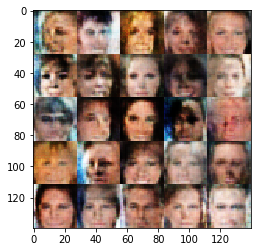

Epoch 1/1... Discriminator Loss: 0.8230... Generator Loss: 1.4906
Epoch 1/1... Discriminator Loss: 0.7798... Generator Loss: 1.1894
Epoch 1/1... Discriminator Loss: 1.2827... Generator Loss: 0.4445
Epoch 1/1... Discriminator Loss: 0.8106... Generator Loss: 0.8638
Epoch 1/1... Discriminator Loss: 1.3370... Generator Loss: 3.1371
Epoch 1/1... Discriminator Loss: 1.4198... Generator Loss: 3.0106
Epoch 1/1... Discriminator Loss: 0.8338... Generator Loss: 1.4271
Epoch 1/1... Discriminator Loss: 0.7475... Generator Loss: 1.8520
Epoch 1/1... Discriminator Loss: 0.8466... Generator Loss: 1.7068
Epoch 1/1... Discriminator Loss: 1.5789... Generator Loss: 0.3028


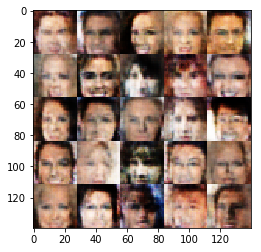

Epoch 1/1... Discriminator Loss: 1.5959... Generator Loss: 0.3028
Epoch 1/1... Discriminator Loss: 1.3383... Generator Loss: 0.4081
Epoch 1/1... Discriminator Loss: 0.8289... Generator Loss: 0.9812
Epoch 1/1... Discriminator Loss: 0.6880... Generator Loss: 1.5882
Epoch 1/1... Discriminator Loss: 0.6842... Generator Loss: 1.4374
Epoch 1/1... Discriminator Loss: 0.7051... Generator Loss: 1.4396
Epoch 1/1... Discriminator Loss: 0.7061... Generator Loss: 1.5484
Epoch 1/1... Discriminator Loss: 1.1404... Generator Loss: 2.9173
Epoch 1/1... Discriminator Loss: 0.9103... Generator Loss: 1.1595
Epoch 1/1... Discriminator Loss: 0.6285... Generator Loss: 1.8045


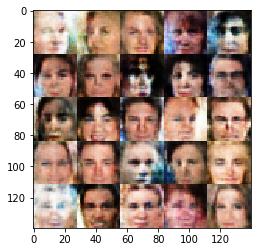

Epoch 1/1... Discriminator Loss: 0.9244... Generator Loss: 0.9215
Epoch 1/1... Discriminator Loss: 0.8092... Generator Loss: 1.5620
Epoch 1/1... Discriminator Loss: 0.5889... Generator Loss: 1.5704
Epoch 1/1... Discriminator Loss: 0.9971... Generator Loss: 2.7798
Epoch 1/1... Discriminator Loss: 0.7911... Generator Loss: 1.9098
Epoch 1/1... Discriminator Loss: 0.7907... Generator Loss: 2.2753
Epoch 1/1... Discriminator Loss: 0.6853... Generator Loss: 1.3766
Epoch 1/1... Discriminator Loss: 0.9754... Generator Loss: 0.7472
Epoch 1/1... Discriminator Loss: 1.2564... Generator Loss: 0.4853
Epoch 1/1... Discriminator Loss: 0.9427... Generator Loss: 0.6889


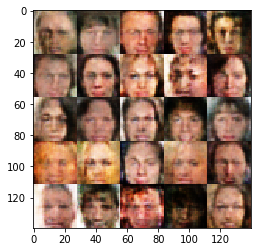

Epoch 1/1... Discriminator Loss: 1.1088... Generator Loss: 0.6850
Epoch 1/1... Discriminator Loss: 1.2436... Generator Loss: 0.5012
Epoch 1/1... Discriminator Loss: 1.6412... Generator Loss: 0.2962
Epoch 1/1... Discriminator Loss: 1.1573... Generator Loss: 2.8794
Epoch 1/1... Discriminator Loss: 0.8143... Generator Loss: 1.0583
Epoch 1/1... Discriminator Loss: 1.3268... Generator Loss: 0.4534
Epoch 1/1... Discriminator Loss: 1.2986... Generator Loss: 0.4794
Epoch 1/1... Discriminator Loss: 1.7604... Generator Loss: 0.2545
Epoch 1/1... Discriminator Loss: 0.7666... Generator Loss: 1.0613
Epoch 1/1... Discriminator Loss: 0.6633... Generator Loss: 2.6125


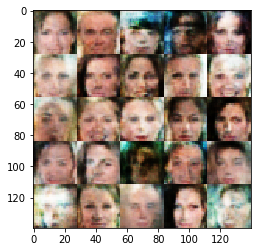

Epoch 1/1... Discriminator Loss: 0.9815... Generator Loss: 0.7314
Epoch 1/1... Discriminator Loss: 0.7594... Generator Loss: 1.4402
Epoch 1/1... Discriminator Loss: 0.6884... Generator Loss: 2.0568
Epoch 1/1... Discriminator Loss: 0.6886... Generator Loss: 1.6277
Epoch 1/1... Discriminator Loss: 0.7077... Generator Loss: 1.9338
Epoch 1/1... Discriminator Loss: 2.0110... Generator Loss: 0.1994
Epoch 1/1... Discriminator Loss: 0.8840... Generator Loss: 0.7747
Epoch 1/1... Discriminator Loss: 1.3670... Generator Loss: 0.4115
Epoch 1/1... Discriminator Loss: 1.1634... Generator Loss: 0.5253
Epoch 1/1... Discriminator Loss: 1.1904... Generator Loss: 0.4866


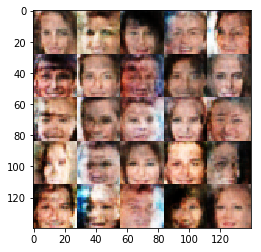

Epoch 1/1... Discriminator Loss: 0.9614... Generator Loss: 0.8631
Epoch 1/1... Discriminator Loss: 0.7656... Generator Loss: 1.7007
Epoch 1/1... Discriminator Loss: 1.2380... Generator Loss: 0.4834
Epoch 1/1... Discriminator Loss: 0.8747... Generator Loss: 2.0234
Epoch 1/1... Discriminator Loss: 1.7087... Generator Loss: 0.2574
Epoch 1/1... Discriminator Loss: 0.8286... Generator Loss: 0.9416
Epoch 1/1... Discriminator Loss: 1.2557... Generator Loss: 0.4726
Epoch 1/1... Discriminator Loss: 1.1399... Generator Loss: 0.5317
Epoch 1/1... Discriminator Loss: 0.7987... Generator Loss: 0.9159
Epoch 1/1... Discriminator Loss: 0.7498... Generator Loss: 1.6228


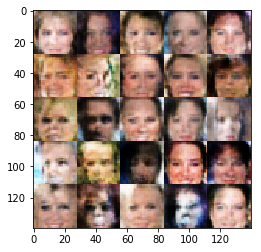

Epoch 1/1... Discriminator Loss: 0.8433... Generator Loss: 2.1309
Epoch 1/1... Discriminator Loss: 0.9438... Generator Loss: 2.4392
Epoch 1/1... Discriminator Loss: 0.6693... Generator Loss: 2.2875
Epoch 1/1... Discriminator Loss: 0.7308... Generator Loss: 1.7911
Epoch 1/1... Discriminator Loss: 0.8271... Generator Loss: 1.9819
Epoch 1/1... Discriminator Loss: 1.6729... Generator Loss: 0.3172
Epoch 1/1... Discriminator Loss: 1.1908... Generator Loss: 0.5798
Epoch 1/1... Discriminator Loss: 0.8365... Generator Loss: 0.8959
Epoch 1/1... Discriminator Loss: 2.9532... Generator Loss: 0.0965
Epoch 1/1... Discriminator Loss: 1.1540... Generator Loss: 0.5339


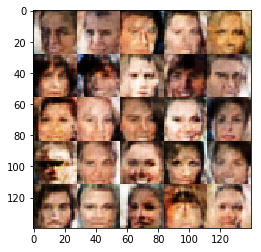

Epoch 1/1... Discriminator Loss: 0.9805... Generator Loss: 0.6504
Epoch 1/1... Discriminator Loss: 1.5525... Generator Loss: 0.3365
Epoch 1/1... Discriminator Loss: 0.7003... Generator Loss: 1.7982
Epoch 1/1... Discriminator Loss: 1.2663... Generator Loss: 0.4471
Epoch 1/1... Discriminator Loss: 1.0268... Generator Loss: 0.6220
Epoch 1/1... Discriminator Loss: 0.6626... Generator Loss: 1.7967
Epoch 1/1... Discriminator Loss: 1.1761... Generator Loss: 3.0235
Epoch 1/1... Discriminator Loss: 0.7177... Generator Loss: 1.5561
Epoch 1/1... Discriminator Loss: 0.8703... Generator Loss: 0.8404
Epoch 1/1... Discriminator Loss: 0.6039... Generator Loss: 1.3976


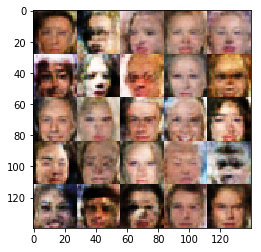

Epoch 1/1... Discriminator Loss: 0.9424... Generator Loss: 0.6743
Epoch 1/1... Discriminator Loss: 1.3954... Generator Loss: 0.3809
Epoch 1/1... Discriminator Loss: 2.8421... Generator Loss: 0.0870
Epoch 1/1... Discriminator Loss: 0.6600... Generator Loss: 1.5309
Epoch 1/1... Discriminator Loss: 0.9174... Generator Loss: 2.4471
Epoch 1/1... Discriminator Loss: 0.9243... Generator Loss: 2.5959
Epoch 1/1... Discriminator Loss: 1.0086... Generator Loss: 0.6011
Epoch 1/1... Discriminator Loss: 1.1985... Generator Loss: 0.4728
Epoch 1/1... Discriminator Loss: 1.3127... Generator Loss: 0.4253
Epoch 1/1... Discriminator Loss: 1.0909... Generator Loss: 0.5847


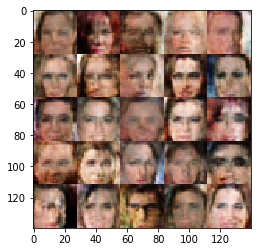

Epoch 1/1... Discriminator Loss: 1.5230... Generator Loss: 0.3388
Epoch 1/1... Discriminator Loss: 0.7238... Generator Loss: 2.2911
Epoch 1/1... Discriminator Loss: 0.8465... Generator Loss: 0.7563
Epoch 1/1... Discriminator Loss: 1.5208... Generator Loss: 0.3482
Epoch 1/1... Discriminator Loss: 0.7533... Generator Loss: 0.9574
Epoch 1/1... Discriminator Loss: 0.7628... Generator Loss: 0.9311
Epoch 1/1... Discriminator Loss: 0.6584... Generator Loss: 2.6240
Epoch 1/1... Discriminator Loss: 0.6891... Generator Loss: 1.2169
Epoch 1/1... Discriminator Loss: 0.8772... Generator Loss: 0.9551
Epoch 1/1... Discriminator Loss: 1.6264... Generator Loss: 0.3000


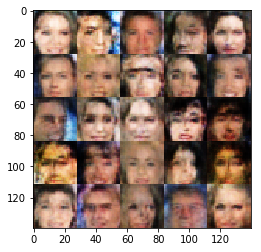

Epoch 1/1... Discriminator Loss: 0.8947... Generator Loss: 0.9023
Epoch 1/1... Discriminator Loss: 0.6615... Generator Loss: 1.1355
Epoch 1/1... Discriminator Loss: 0.7485... Generator Loss: 1.6916
Epoch 1/1... Discriminator Loss: 0.9313... Generator Loss: 2.5040
Epoch 1/1... Discriminator Loss: 0.8556... Generator Loss: 2.2607
Epoch 1/1... Discriminator Loss: 0.8966... Generator Loss: 0.7710
Epoch 1/1... Discriminator Loss: 1.0436... Generator Loss: 0.6292
Epoch 1/1... Discriminator Loss: 1.7575... Generator Loss: 0.2890
Epoch 1/1... Discriminator Loss: 1.0691... Generator Loss: 0.6021
Epoch 1/1... Discriminator Loss: 1.6642... Generator Loss: 0.2973


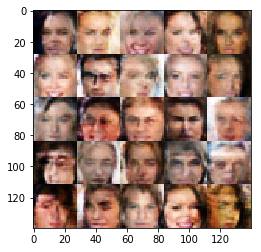

Epoch 1/1... Discriminator Loss: 1.0033... Generator Loss: 0.6608
Epoch 1/1... Discriminator Loss: 0.7413... Generator Loss: 2.7402
Epoch 1/1... Discriminator Loss: 1.0747... Generator Loss: 2.8963
Epoch 1/1... Discriminator Loss: 1.0941... Generator Loss: 0.6642
Epoch 1/1... Discriminator Loss: 1.0943... Generator Loss: 0.5327
Epoch 1/1... Discriminator Loss: 0.9034... Generator Loss: 0.8777
Epoch 1/1... Discriminator Loss: 1.5431... Generator Loss: 0.3558
Epoch 1/1... Discriminator Loss: 0.6765... Generator Loss: 1.1247
Epoch 1/1... Discriminator Loss: 0.8486... Generator Loss: 0.9005
Epoch 1/1... Discriminator Loss: 1.1671... Generator Loss: 3.6970


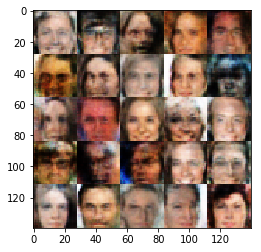

Epoch 1/1... Discriminator Loss: 0.8218... Generator Loss: 1.4985
Epoch 1/1... Discriminator Loss: 0.8576... Generator Loss: 0.8114
Epoch 1/1... Discriminator Loss: 0.8234... Generator Loss: 0.8341
Epoch 1/1... Discriminator Loss: 0.9279... Generator Loss: 0.7357
Epoch 1/1... Discriminator Loss: 1.9110... Generator Loss: 0.2294
Epoch 1/1... Discriminator Loss: 1.5292... Generator Loss: 0.3478


In [23]:
batch_size = 64
z_dim = 128
learning_rate = 0.0005
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.